# The Leaky Integrate-and-Fire (LIF)

The first time you open this notebook, follow the instructions below...

In [ ]:
# Run only this first 'cell', when starting your notebook session.
# It will take ~3min
!curl -fsSL https://raw.githubusercontent.com/mgiugliano/PrinciplesCompNeurosciencesCourse/main/pvt/deploy_julia.sh | sh

# When the process is completed, perform a 'page refresh'.

We are now considering to numerically simulate and study the "leaky" Integrate-and-Fire model neuron. This model is uniquely characterised by a single state-variable (i.e. the membrane potential $V(t)$), which evolves in time below the threshold $\theta$ for emission of action potentials, according to a simple first-order ordinary differential equation, whose *external input* is $I$ - here considered to be constant in time: 

$$C \frac{dV(t)}{dt} = \frac{E - V}{R} + I$$

Whenever $V(t)$ hits the threshold $\theta$, a spike *is said to occur* (but not explicitly modelled) and $V(t)$ is reset to its resting potential $E$ and kept there for a refractory period $\tau_{arp}$. 

Let's define the (biophysical) parameters of the model and some key numerical simulation variables.

Time to check the Julia *kernel*. Run each of the two 'cells' below. 

Do they work?! Does Julia print **25** and plots a graph?!?

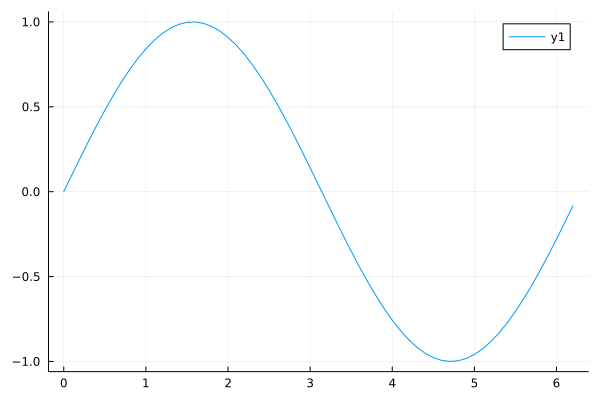

In [2]:
using Plots
x = 0:0.1:6.28
y = sin.(x)
plot(x, y)

In [7]:
 T = 300.   # Maximal lifetime of the simulation [ms] 
 Δt= 0.1    # Integration time tep by which t is incremented as time goes by [ms]

 R     = 20    # <embrane (specific) resistance [MOhm/cm^2]
 C     = 1.    # Membrane (specific) capacitance [uF/cm^2]
 E     = -70.  # Membrane resting potential [mV]
 θ     = -50.  # Excitability threshold [mV]
 Vmax  = 10.   # Peak voltage during a spike [mV] - purely aesthetical reasons!
 Tarp  = 10.    # Absolute refractory period [ms]
	
 # Initalisation of the data structures
 time = 0:Δt:T;      # Array containing the "current time" [ms]
 N    = length(time);# Length of "time", i.e. how many discrete time steps;

In [8]:
 function IF(I)	
  W    = zeros(N,1)  # Array containing V as the time goes by
  Nspikes = 0        # Counter for the number of spikes 

  # Initial conditions:
  V     = E;          # Membrane voltage of the cell [mV]
  ko    = -100;       # Last time (as integer) an action potential occurred
  
  # Euler method ---------------------------------------------------------------
  for k=1:N # Loop over each discrete step for time t

   if (V >= θ)     # Ops! V just exceeded the threshold: an AP will occur!
    W[k] = Vmax    # You will understand why I say: this is only "aesthetic"  
    V  = E         # V is then re-set to the resting potential, after a AP.
    ko = k         # The last time a AP occurred is updated with the current time.
    Nspikes = Nspikes + 1       
   elseif (k-ko)<(Tarp/Δt) # Otherwise, is the neuron still "refractory" ?
    V = E          # Then B does not change in time: it must be kept "clamped"
    W[k] = E
   else            # Otherwise
    V = V + Δt/(R*C) * (E - V) + Δt/C * I;  # V evolves, integrating I...
    W[k] = V
   end # if
 end # for

 freq = round(1000. * Nspikes / T) 
		
 return W, freq    
end		

IF (generic function with 1 method)

In [75]:
 function IF2(Iext)
  N    = length(Iext)
  W    = zeros(N,1)  # Array containing V as the time goes by
  Nspikes = 0        # Counter for the number of spikes 

  # Initial conditions:
  V     = E;          # Membrane voltage of the cell [mV]
  ko    = -100;       # Last time (as integer) an action potential occurred
        
  # Euler method ---------------------------------------------------------------
  for k=1:N # Loop over each discrete step for time t

   if (V >= θ)     # Ops! V just exceeded the threshold: an AP will occur!
    W[k] = Vmax    # You will understand why I say: this is only "aesthetic"  
    V  = E         # V is then re-set to the resting potential, after a AP.
    ko = k         # The last time a AP occurred is updated with the current time.
    Nspikes = Nspikes + 1       
   elseif (k-ko)<(Tarp/Δt) # Otherwise, is the neuron still "refractory" ?
    V = E          # Then B does not change in time: it must be kept "clamped"
    W[k] = E
   else            # Otherwise
    V = V + Δt/(R*C) * (E - V) + Δt/C * Iext[k];  # V evolves, integrating I...
    W[k] = V
   end # if
 end # for

 freq = round(1000. * Nspikes / T) 
		
 return W, freq    
end		

IF2 (generic function with 1 method)

In [56]:
function plot_all(xa, ya, xb, yb)
 # Plotting instructions ------------------------------------------------------		
  plot(xa, ya, 
      label="Numerical solution",
      linewidth=3, 
      linecolor=:black, 
      xtickfont=font(14, "Arial"),
      ytickfont=font(14, "Arial"),
      framestyle = :origin); # Numerical sol.

  plot!(xb, yb, 
      #label="Analytical solution (of a RC)", 
      linewidth=1, 
      linecolor=:blue, 
      title="Integrate-and-Fire model", 
      xtickfont=font(14, "Arial"),
      ytickfont=font(14, "Arial"),
      leg = :false,
      framestyle = :origin); # Analytical sol.

  xlims!((0,T))
  ylims!((-90,20))
  xlabel!("time [ms]")                # Label for the horizontal axis
  ylabel!("Membrane potential [mV]")  # Label for the vertical axis
end

plot_all (generic function with 1 method)

# Play with the amplitude of the external current $I$

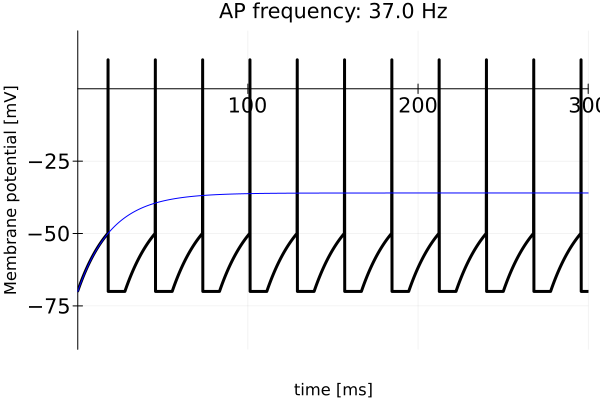

In [58]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
I = 1.7 #@param {type:"slider", min:-1, max:5, step:0.1}


W, freq = IF(I)

Wanalyt = (-R*I) * exp.(-time/(R*C)) + (R*I+E)*ones(N,1)

time = 0:Δt:T;        # Array containg the "time" axis [ms]

plot_all(time, W, time, Wanalyt)
plot!(title="AP frequency: $(freq) Hz")

# Explore absolute refractoryness

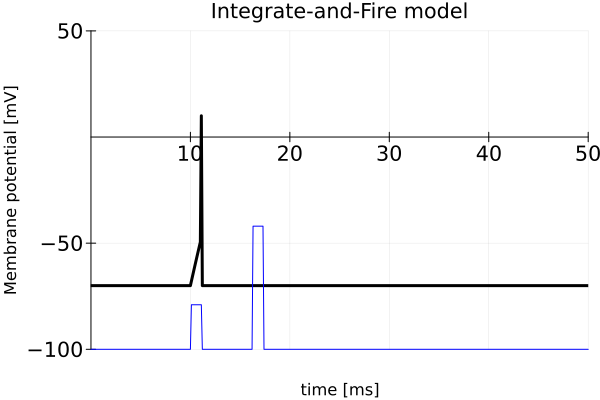

In [103]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
T = 50.
I0 = 21 #@param {type:"slider", min:0, max:100, step:1}
I1 = 58 #@param {type:"slider", min:0, max:100, step:1}
T0 = 5.1 #@param {type:"slider", min:0.1, max:50, step:1}

delay = 10.

i1 = 0:Δt:delay
i2 = (i1[end] + Δt):Δt:(i1[end] + Δt + 10*Δt)
i3 = (i2[end] + Δt):Δt:(i2[end] + Δt + T0)
i4 = (i3[end] + Δt):Δt:(i3[end] + Δt + 10*Δt)
i5 = (i4[end] + Δt):Δt:T

M1 = length(i1)
M2 = length(i2)
M3 = length(i3)
M4 = length(i4)
M5 = length(i5)

Iext = [zeros(M1,1); I0 .* ones(M2,1); zeros(M3,1); I1 .* ones(M4,1); zeros(M5,1)]

W2 = IF2(Iext)

time = 0:Δt:T;        # Array containg the "time" axis [ms]

plot_all(time, W2, time, Iext.-100)

xlims!((0,50))
ylims!((-100,50))